¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [92]:
# importar librerías
import pandas as pd 

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo importar y cargar la librería de matplolib.pyplot para el desarrollo de las diferentes gráficas que te van a ayudar al análisis de los datos. 
</div>

In [93]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv("/datasets/instacart_orders.csv",sep=";")
products = pd.read_csv("/datasets/products.csv",sep=";")
order_products = pd.read_csv("/datasets/order_products.csv",sep=";")
aisles = pd.read_csv("/datasets/aisles.csv",sep=";")
departments = pd.read_csv("/datasets/departments.csv",sep=";")

In [94]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [95]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [96]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [97]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [98]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Como conclusiones parciales de esta primera etapa, podemos observar lo siguiente:

1. En la data **orders** la variable *days_since_prior_order* tiene valores perdidos. Adicionalmente, todas las variables están categorizadas como numéricas, la mayoría como enteros (int), a excepción de *days_since_prior_order* que está almacenada como una variable numérica continua (float); sin embargo, sería mejor que las variables que hacen referencia a los ID (*order_id* y *user_id*) sean trabajadas como categóricas (object). 
2. En la data **products** la variable *product_name* tiene valores perdidos. Además, la mayoría de variables están categorizadas como numéricas, a excepción de la variable *product_name* que está clasificada como una variable categórica. Empero, sería más adecuado que las variables que hacen referencia a los ID (*product_id*, *aisle_id* y *department_id*) sean trabajadas como categóricas (object). 
3. En la data **order_products** la variable *add_to_cart_order* tiene valores perdidos. Adicionalmente, todas las variables están categorizadas como numéricas, la mayoría como enteros (int), a excepción de *add_to_cart_order* que está almacenada como una variable numérica continua (float); sin embargo, sería mejor que las variables que hacen referencia a los ID (*order_id* y *product_id*) sean trabajadas como categóricas (object). 
4. En la data **aisles** sería más adecuado reconfigurar la variable que hace referencia a un número de identificación (*aisle_id*), para almacenarla como una variable categórica (object).
5. En la data **departments** sería más adecuado reconfigurar la variable que hace referencia a un código de identificación (*department_id*), para almacenarla como una variable categórica (object).
6. Si bien no todas las datas compartes una misma variable entre las cinco, podemos observar que si es posible unir todas para tener solo una gran data. En efecto, **instacart_orders** y **order_products** comparten la variable *order_id*. Además **products** y **order_products** comparten la variable *product_id*. Sumado a lo anterior, la data **products** comparte variables con las datas **aisles** (*aisle_id*) y **departments** (*department_id*).
7. Debemos analizar un poco más para observar duplicados.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Primero debemos ver un poco de información de cada data con *head* para ver si hay decimales en las columnas de ID. Sumado a lo anterior, es posible observar que algunas variables tienen valores perdidos, ante lo cual tendriamos que omitirlos o completarlos, evaluando cada caso según corresponda. Finalmente tendríamos que identificar si hay duplicados y eliminarlos en caso los encontremos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [1]:
# Revisa si hay pedidos duplicados
print(orders[orders.duplicated()])

NameError: name 'data' is not defined

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

- Para poder observar con mayor detalle el comportamiento de los casos duplicados es mejor usar *duplicated*. Realizado ello, es posible observar que todas las órdenes duplicadas ocurrieron el mismo día (miércoles) y a la misma hora (2 am)

In [100]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders[(orders["order_dow"]==3) & (orders["order_hour_of_day"]==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
- Todavía no es posible observar los resultados con mucho detalle, pero hay que considerar que solo podemos visualizar 10 filas de un total de 121, representando ello aproximadamente al 8.26% de los casos.

In [101]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()
print(orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [102]:
# Vuelve a verificar si hay filas duplicadas
print(orders[orders.duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [103]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders.duplicated("order_id").sum())

0


Puede observarse que la data se redujo de 478967 a 478952 casos y que en esta data actualizada ya no hay duplicados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de duplicados y eliminaste esos casos. 
    
</div>

### `products` data frame

In [104]:
# Verifica si hay filas totalmente duplicadas
print(products[products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [105]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products.duplicated("department_id").sum()) 

49673


In [106]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"] = products["product_name"].str.upper()
print(products.duplicated("product_name").sum())

1361


In [107]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products["product_name"].dropna().duplicated().sum())

104


Primero, es posible observar que no hay filas totalmente duplicadas. Sin embargo, también podemos ver que de 49694 casos 49673 son duplicados para la variable *department_id*, representando ello al 99.96% de los datos. Adicionalmente, se puede observar que la variable *product_name* cuenta con 1361 casos duplicados, representando ello al 2.74% de la data. Sin embargo, si consideramos solo los duplicados de productos no faltantes, la cantidad se reduce a 104, representando ella al 0.21% de la data.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de duplicados. Para complementar el análisis, qué podríamos decir de estos 104 productos duplicados? 
    
</div>

### `departments` data frame

In [108]:
# Revisa si hay filas totalmente duplicadas
print(departments[departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [109]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments.duplicated("department_id").sum())

0


Podemos ver que en la data **departments** no hay filas duplicadas ni duplicados en la variable *department_id*

### `aisles` data frame

In [110]:
# Revisa si hay filas totalmente duplicadas
print(aisles[aisles.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [111]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles.duplicated("aisle_id").sum())

0


Podemos ver que en la data **aisles** no hay filas duplicadas ni duplicados en la variable *aisle_id*

### `order_products` data frame

In [112]:
# Revisa si hay filas totalmente duplicadas
print(order_products[order_products.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [113]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products.duplicated().sum())

0


Podemos observar que en la data **order_products** no hay valores duplicados

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [114]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products["product_name"].isnull().sum())

1258


Es posible observar que hay 1258 valores perdidos en la variable *product_name* de la data **products** 

In [115]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print((products["product_name"].isnull() & (products["aisle_id"] == 100)).sum())

1258


Sí, todos los nombres de los productos pertenecen al pasillo con ID 100

In [116]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print((products["product_name"].isnull() & (products["department_id"] == 21)).sum())

1258


Sí, todos los nombres de los productos pertenecen al departamento con ID 21

In [117]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = products[products["aisle_id"] == 100]
department_21 = products[products["department_id"] == 21]
print(aisle_100)
print(department_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417      

Puede observarse que todos los valores perdidos de la variable *product_name* tienen dos aspectos en común: 
1. todas comparten el mismo *aisle_id*, siendo este el valor 100
2. todas comparten el mismo *department_id*, siendo este el valor 21

In [118]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")
print(products["product_name"].isnull().sum())

0


Con este último código modifiqué los valores perdidos para que el nuevo valor sea "Unknown" y luego de ello comprobé si todos los cambios se habían hecho de manera correcta. Es decir, si ya no teniámos valores perdidos en la variable *product_name*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de valores faltantes y los llenaste con "unknown".
    
</div>

### `orders` data frame

In [119]:
# Encuentra los valores ausentes
print(orders.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [120]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print((orders["days_since_prior_order"].isnull() & (orders["order_number"] > 1)).any())

False


Puede observarse que hay 28817 valores ausentes y que todos estos casos comparten ser el primer pedido del cliente

### `order_products` data frame

In [121]:
# Encuentra los valores ausentes
print(order_products.isnull().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [122]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor mínimo",order_products["add_to_cart_order"].min())
print("Valor máximo",order_products["add_to_cart_order"].max())

Valor mínimo 1.0
Valor máximo 64.0


Podemos ver que la variable *add_to_cart_order* tiene un rango de 63. Siendo el valor mínimo 1 y el máximo 64.

In [123]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
print(order_products[order_products["add_to_cart_order"].isnull()]["order_id"].unique())

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [124]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
missing_values= order_products[order_products["add_to_cart_order"].isnull()]
print()
print(all(missing_values.groupby("order_id")["product_id"].count() > 64))

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_values.groupby("order_id")

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print()
print(missing_values.groupby("order_id")["product_id"].count())


False

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64


Honestamente me sentí un poco confundida con las indicaciones. Pero en general, puedo observar que hay 836 valores perdidos en la variable *add_to_cart_order*, que el valor mínimo de esta variable es 1 y el valor máximo 64. Además, se observa que hay 70 ID de pedidos con un valor ausente en la variable *add_to_cart_order* y que ningún pedido con valor ausente tiene más de 64 productos, siendo el rango de 1 a 63. 

In [125]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype(int)
print(orders.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


Finalmente se realiza el cambio en la variable *add_to_cart_order* y se verifica que ya no hay valores perdidos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buena conclusión de esta base. Pero qué podríamos decir de los pedidos que tienen más de 64 productos?
</div>

## Conclusiones

Como conclusión parcial de esta segunda etapa, puede observarse que en las datas **products** y **orders** había valores duplicados en algunas variables, siendo estos eliminados para un mejor análisis. Adicionalmente, también fue posible observar que todos los valores perdidos de la variable *product_name* de la data **products** comparten otras características, siendo estas los mismos valores para los ID de departamento (21) y los ID de pasillo (100). Sumado a lo anterior, se observó que todos los valores perdidos de la variable *days_since_prior_order* de la data **orders** comparten ser el primer pedido de los respectivos clientes y que los valores perdidos en la variable *add_to_cart_order* de la data **order_products** se distribuyeron entre 70 ID de productos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [126]:
print(sorted(orders["order_hour_of_day"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [127]:
print(sorted(orders["order_dow"].unique()))

[0, 1, 2, 3, 4, 5, 6]


Puede observarse que tanto la variable *order_hour_of_day* como la variable *order_dow* tienen valores razonables para lo que trasmite la variable.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Órdenes realizadas para cada hora del día'}, xlabel='Hora del día', ylabel='Cantidad de personas que realizan órdenes'>

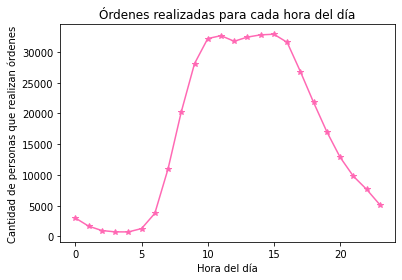

In [128]:
from matplotlib import pyplot as plt

orders.groupby("order_hour_of_day")["user_id"].nunique().plot(color="hotpink",
                                                              style="*-",
                                                              title="Órdenes realizadas para cada hora del día",
                                                              xlabel="Hora del día",
                                                              ylabel="Cantidad de personas que realizan órdenes")

Es posible observar que la cantidad de compradores comienza a aumentar a partir de las 5 horas, alcanzando su puntos máximos entre las 10 y las 16, para luego comenzar a decrecer. Conocer los horarios de mayor afluencia resultan útiles para poder tener la logística de personal necesaria para cumplir con la demanda. Asimismo, conocer los horarios con menor concurrencia de pedidos son útiles para que se puedan diseñar promociones especiales.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buen trabajo el desarrollar una gráfica para visualizar los resultados
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

([<matplotlib.axis.XTick at 0x7fc3f69df8e0>,
 [Text(0, 0, 'Domingo'),
  Text(1, 0, 'Lunes'),
  Text(2, 0, 'Martes'),
  Text(3, 0, 'Miércoles'),
  Text(4, 0, 'Jueves'),
  Text(5, 0, 'Viernes'),
  Text(6, 0, 'Sábado')])

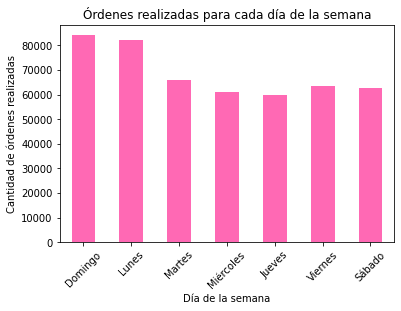

In [129]:
orders["order_dow"].value_counts().sort_index().plot(kind="bar",
                                                     color="hotpink",
                                                     title="Órdenes realizadas para cada día de la semana",
                                                     xlabel="Día de la semana",
                                                     ylabel="Cantidad de órdenes realizadas")

dias_semana = ["Domingo","Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]

plt.xticks(range(7), dias_semana, rotation=45)

Es posible observar que los días con mayor cantidad de órdenes son los domingos y los lunes. Conocer esto permite que la plataforma pueda realizar las acciones necesarias para estar preparada ante esta demanda. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor mínimo de días desde el pedido anterior: 0.0
Valor máximo de días desde el pedido anterior: 30.0


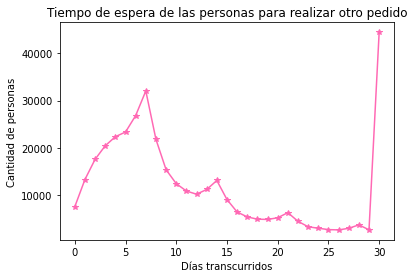

In [130]:
orders.groupby("days_since_prior_order")["user_id"].nunique().plot(color="hotpink",
                                                                   style="*-",
                                                                   title="Tiempo de espera de las personas para realizar otro pedido",
                                                                   xlabel="Días transcurridos",
                                                                   ylabel="Cantidad de personas")

print("Valor mínimo de días desde el pedido anterior:", orders["days_since_prior_order"].min())
print("Valor máximo de días desde el pedido anterior:", orders["days_since_prior_order"].max())

Puede observarse que lo mínimo que un cliente espera para realizar otro pedido es menos de un día y lo máximo más de 30. Se observa además que el valor modal son 30 días. Por ende, sería adecuado identificar a estos usuarios y ofrecerles promociones, para así incentivar que utilicen la plataforma con mayor frecuencia. 

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, pero pareciera que las personas que tardan 30 días puede ser un error. Entonces te sugiero complementar este análisis con una gráfica donde se muestren los valores sin contar los de 30
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [131]:
orders_miercoles = orders[orders["order_dow"] == 4]["order_hour_of_day"].value_counts().sort_index()
orders_sabado = orders[orders["order_dow"] == 6]["order_hour_of_day"].value_counts().sort_index()

<AxesSubplot:title={'center':'Distribución de compras los días miércoles'}, xlabel='Horas del día', ylabel='Cantidad de compras'>

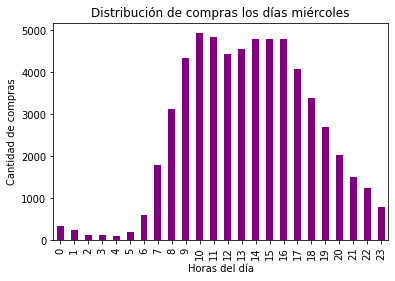

In [132]:
orders_miercoles.plot(kind="bar", 
                      color="purple",
                      title="Distribución de compras los días miércoles",
                      xlabel="Horas del día",
                      ylabel="Cantidad de compras")

<AxesSubplot:title={'center':'Distribución de compras los días sábados'}, xlabel='Horas del día', ylabel='Cantidad de compras'>

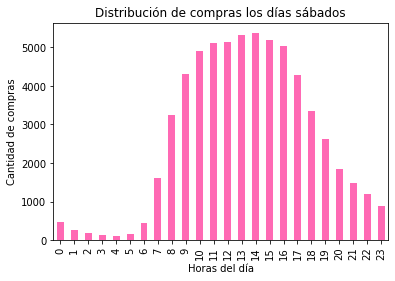

In [133]:
orders_sabado.plot(kind="bar", 
                   color="hotpink",
                   title="Distribución de compras los días sábados",
                   xlabel="Horas del día",
                   ylabel="Cantidad de compras")

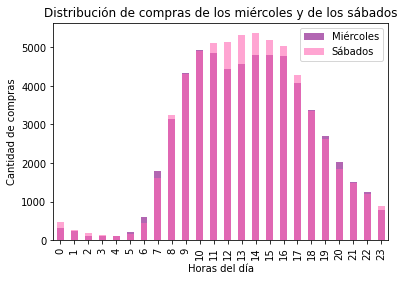

In [169]:
orders_miercoles.plot(kind="bar", 
                      color="purple",
                      alpha=0.6)

orders_sabado.plot(kind="bar", 
                   alpha=0.6,
                   color="hotpink",
                   title="Distribución de compras de los miércoles y de los sábados",
                   xlabel="Horas del día",
                   ylabel="Cantidad de compras")

plt.legend(["Miércoles","Sábados"])

Puede observarse que la distribución de compras de los miércoles no varía de manera considerable a la distribución de compras de los sábados. Empero, se destaca que los sábados ocurre mayor afluencia de compras entre las 11 horas hasta las 17 horas para luego, compartir niveles similares a la ocurrencia de los miércoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:title={'center':'Distribución de pedidos por cliente'}, ylabel='Frequency'>

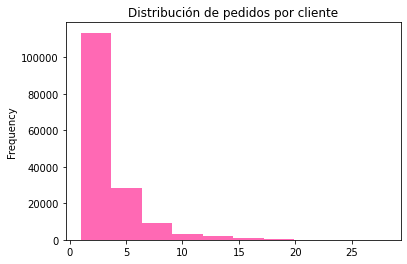

In [135]:
orders.groupby("user_id")["order_id"].count().plot(kind="hist", 
                                                   color="hotpink",
                                                   title="Distribución de pedidos por cliente",
                                                   xlabel="Cantidad de clientes",
                                                   ylabel="Cantidad de pedidos")

In [136]:
print(pd.DataFrame(sorted(orders.groupby("user_id")["order_id"].count()),columns=["Número de órdenes"]))

        Número de órdenes
0                       1
1                       1
2                       1
3                       1
4                       1
...                   ...
157432                 24
157433                 24
157434                 25
157435                 26
157436                 28

[157437 rows x 1 columns]


Puede observarse que la mayoría de clientes realiza solo un pedido y que la mayor cantidad de pedidos que ha realizado un cliente han sido 28.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [138]:
data_merged = pd.merge(order_products, products, on="product_id", how="inner") 
data_merged = pd.merge(data_merged, orders, on="order_id", how="inner")

In [139]:
top_products = data_merged['product_name'].value_counts().reset_index().rename(columns={"index": "product_name", "product_name": "frecuencia"})

In [140]:
print(pd.merge(top_products, products[["product_id", "product_name"]], on="product_name", how="left").drop_duplicates().head(20)[["product_id", "product_name", "frecuencia"]])

    product_id              product_name  frecuencia
0        24852                    BANANA       66050
1        13176    BAG OF ORGANIC BANANAS       53297
2        21137      ORGANIC STRAWBERRIES       37039
3        21903      ORGANIC BABY SPINACH       33971
4        47209      ORGANIC HASS AVOCADO       29773
5        47766           ORGANIC AVOCADO       24689
6        47626               LARGE LEMON       21495
7        16797              STRAWBERRIES       20018
8        26209                     LIMES       19690
9        27845        ORGANIC WHOLE MILK       19600
10       27966       ORGANIC RASPBERRIES       19197
11       22935      ORGANIC YELLOW ONION       15898
12       24964            ORGANIC GARLIC       15292
13       45007          ORGANIC ZUCCHINI       14584
14       39275       ORGANIC BLUEBERRIES       13879
15       49683            CUCUMBER KIRBY       13675
16       28204        ORGANIC FUJI APPLE       12544
17        5876             ORGANIC LEMON      

Es posible observar que el producto más popular en la plataforma es el plátano, siendo este adquirido un total de 66 050 veces, mientras que el último producto del top 20 serían los tomates uva con un total de 11 781. Un aspecto que se destaca es que la gran mayoría de productos ubicados en el top 20 corresponden a frutas, verduras y/o sus versiones orgánicas. Por tanto, sería adecuado que se buscara ampliar la oferta de este tipo de productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen desarrollo de la sección. Desarrollaste de buena manera todos los análisis y lo complementaste con una gráfica. 
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [141]:
print(order_products.groupby("order_id")["product_id"].count().mean())

10.098983215049127


<AxesSubplot:title={'center':'Cantidad de artículos por pedidos'}, ylabel='Frequency'>

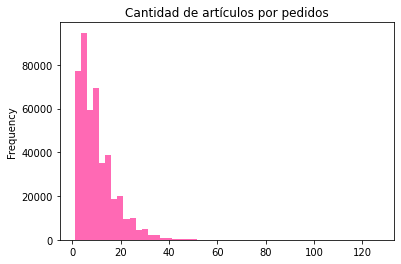

In [142]:
order_products.groupby("order_id")["product_id"].count().plot(kind="hist", 
                                                              bins=50, 
                                                              color="hotpink",
                                                              title="Cantidad de artículos por pedidos")

In [186]:
print(order_products["order_id"].value_counts().value_counts().to_frame("Cantidad de pedidos").rename_axis("Cantidad de artículos"))

                       Cantidad de pedidos
Cantidad de artículos                     
5                                    31923
6                                    31698
4                                    31054
7                                    30822
3                                    29046
...                                    ...
80                                       1
87                                       1
85                                       1
72                                       1
127                                      1

[90 rows x 1 columns]


Es posible observar que la mayoría de pedidos abarcan un rango de 4 a 6 pedidos, siendo la cantidad de pedidos realizados uno y la máxima 127.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [144]:
freq_reorder=data_merged[data_merged["reordered"] == 1]["product_id"].value_counts().reset_index()

In [145]:
freq_reorder.columns = ["product_id", "reorder_frequency"]

In [146]:
top_freq_reorder = pd.merge(freq_reorder.head(20), products, on="product_id", how="left")

In [147]:
print(top_freq_reorder[["product_id", "product_name", "reorder_frequency"]])

    product_id              product_name  reorder_frequency
0        24852                    BANANA              55763
1        13176    BAG OF ORGANIC BANANAS              44450
2        21137      ORGANIC STRAWBERRIES              28639
3        21903      ORGANIC BABY SPINACH              26233
4        47209      ORGANIC HASS AVOCADO              23629
5        47766           ORGANIC AVOCADO              18743
6        27845        ORGANIC WHOLE MILK              16251
7        47626               LARGE LEMON              15044
8        27966       ORGANIC RASPBERRIES              14748
9        16797              STRAWBERRIES              13945
10       26209                     LIMES              13327
11       22935      ORGANIC YELLOW ONION              11145
12       24964            ORGANIC GARLIC              10411
13       45007          ORGANIC ZUCCHINI              10076
14       49683            CUCUMBER KIRBY               9538
15       28204        ORGANIC FUJI APPLE

Es posible observar que el producto que encabeza la lista de los artículos que vuelven a pedirse con mayor frecuencia son los plátanos con un total de 55 763, mientras que la leche mitad a mitad es el último producto del top20 con un total de 8 389. Adicionalmente, se destaca la preferencia de los clientes por las frutas y verduras orgánicas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [201]:
print(data_merged.groupby("product_id")["reordered"].mean().sort_values(ascending=False))

product_id
14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
        ... 
10485    0.0
37690    0.0
10484    0.0
10474    0.0
42984    0.0
Name: reordered, Length: 45573, dtype: float64


<AxesSubplot:title={'center':'Proporción de veces que se vuelve a pedir un producto'}, ylabel='Frequency'>

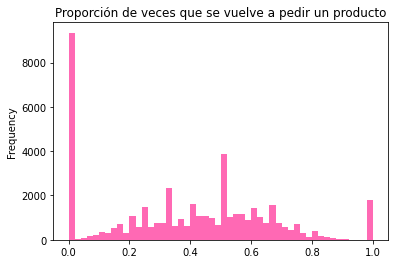

In [199]:
data_merged.groupby("product_id")["reordered"].mean().plot(kind="hist", 
                                                           bins=50, 
                                                           color="hotpink",
                                                           title="Proporción de veces que se vuelve a pedir un producto")

In [203]:
print(data_merged.groupby("product_id")["reordered"].mean().value_counts().sort_index().to_frame("Cantidad de productos").rename_axis("Proporción de repeticiones").sort_values(by="Cantidad de productos"))

                            Cantidad de productos
Proporción de repeticiones                       
0.549430                                        1
0.600775                                        1
0.600713                                        1
0.600567                                        1
0.600484                                        1
...                                           ...
0.250000                                     1266
1.000000                                     1809
0.333333                                     2046
0.500000                                     3273
0.000000                                     9345

[6118 rows x 1 columns]


Es posible observar que la mayoría de productos solo se piden una vez. Empero, entre los productos que se piden en más de una oportunidad, la proporción que se repite con mayor frecuencia es 0.5

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [204]:
print(data_merged.groupby("user_id")["reordered"].mean().value_counts().sort_index().to_frame("Cantidad de clientes").rename_axis("Proporción de repeticiones").sort_values(by="Cantidad de clientes"))

                            Cantidad de clientes
Proporción de repeticiones                      
0.693642                                       1
0.724551                                       1
0.724675                                       1
0.725118                                       1
0.725352                                       1
...                                          ...
0.666667                                    3864
0.333333                                    3896
0.500000                                    6524
1.000000                                    8102
0.000000                                   16635

[5220 rows x 1 columns]


<AxesSubplot:title={'center':'Proporción de veces que se vuelve a pedir un producto por cliente'}, ylabel='Frequency'>

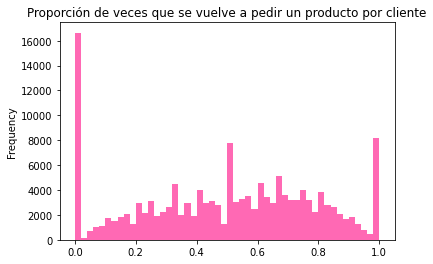

In [152]:
data_merged.groupby("user_id")["reordered"].mean().plot(kind="hist", 
                                                        bins=50, 
                                                        color="hotpink",
                                                        title="Proporción de veces que se vuelve a pedir un producto por cliente")

Es posible observar que la mayoría de clientes no ha pedido sus productos con anterioridad, siendo la segunda proporción más frecuente 1, con 8 102 repeticiones. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [164]:
primera_orden = data_merged[data_merged["add_to_cart_order"] == 1]

In [165]:
primera_orden = primera_orden.groupby(["product_id", "product_name"]).size().reset_index(name="frecuencia").sort_values(by="frecuencia", ascending=False).head(20)

In [166]:
print(primera_orden)

       product_id                 product_name  frecuencia
13414       24852                       BANANA       15562
7127        13176       BAG OF ORGANIC BANANAS       11026
15028       27845           ORGANIC WHOLE MILK        4363
11384       21137         ORGANIC STRAWBERRIES        3946
25439       47209         ORGANIC HASS AVOCADO        3390
11786       21903         ORGANIC BABY SPINACH        3336
25732       47766              ORGANIC AVOCADO        3044
10622       19660                 SPRING WATER        2336
9050        16797                 STRAWBERRIES        2308
15102       27966          ORGANIC RASPBERRIES        2024
24024       44632   SPARKLING WATER GRAPEFRUIT        1914
26519       49235          ORGANIC HALF & HALF        1797
25658       47626                  LARGE LEMON        1737
115           196                         SODA        1733
20853       38689     ORGANIC REDUCED FAT MILK        1397
14158       26209                        LIMES        13

Es posible observar que el producto que lidera el listado de los 20 principales artículos que se ponen primero en el carro de compra son los plátanos, ocurriendo ello en 15 562 oportunidades, cerrando el listado las frambuesas las últimas de la lista con una frecuencia de 1 246 veces. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen desarrollo de la sección. Desarrollaste de buena manera todos los análisis y lo complementaste con una gráfica. 
</div>

### Conclusion general del proyecto:

En conclusión pudimos observar que la mayor afluencia de clientes ocurre en horas de la mañana y se mantiene alta hasta fines de la tarde. Asimismo pudimos observar que los domingos y los lunes son los días de mayor afluencia de clientes. Además, cabe destacar la importancia de los productos orgánicos y de las frutas y verduras para los clientes de esta plataforma. Sumado a lo anterior, sería óptimo que se puedan consideran promociones para que los clientes tengan una menor cantidad de días entre pedidos. Lo anterior debido a que la mayoría de clientes solo pide a través de la plataforma una vez al mes. Además, podrían implementarse campañas para que se pidan una mayor cantidad de artículos por compra, debido a que actualmente la mayor frecuencia oscila entre 4 y 6 productos por pedido. Finalmente, se podría identificar a aquellos clientes que no recompran los productos que adquieren, para indagar el porqué. 

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, análisis de duplicados, y de valores faltantes. Además dearrollaste de buena manera los diferentes anális que se solicitaban y cuando podías los complementabas con greaficas. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos. 
    

*  Profundizar en los resultados intermedios y en la conclusión final.

</div>